In [4]:
from SALib.sample import saltelli
from SALib.analyze import sobol

import numpy as np
import pandas as pd
import math

In [11]:
# 模型输入
problem = {
    'num_vars': 4,
    'names': ['x1', 'x2', 'x3', 'x4'],
    'bounds': [[0, 1],
               [0, 1],
               [0, 1],
               [-8, -2]]
}

def evaluate(X):
    return np.array([x[0] * 0.2245 - x[1] * 0.2452 + x[2] * 0.2452 + x[3] * 0.2851 for x in X])

# 生成数据
param_values = saltelli.sample(problem, 1000)

# 运行模型
Y = evaluate(param_values)

# 灵敏度分析结果
Si = sobol.analyze(problem, Y, print_to_console=True)

Parameter S1 S1_conf ST ST_conf
x1 0.080398 0.024075 0.079541 0.007768
x2 0.178819 0.039058 0.184864 0.015640
x3 0.184616 0.034374 0.184705 0.017624
x4 0.543256 0.056422 0.543852 0.039386

Parameter_1 Parameter_2 S2 S2_conf
x1 x2 -0.000759 0.033767
x1 x3 -0.000874 0.036753
x1 x4 -0.002056 0.038930
x2 x3 0.010618 0.059247
x2 x4 0.007605 0.066591
x3 x4 -0.004191 0.061767


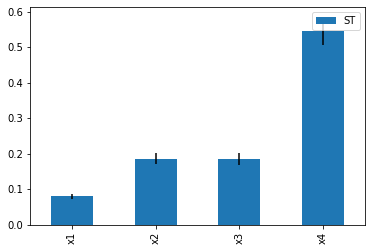

In [12]:
from SALib.plotting.bar import plot as barplot
import matplotlib.pyplot as plot

Si_df = Si.to_df()
img = barplot(Si_df[0])
plot.show()
fig = img.get_figure()
fig.savefig("data/SensitivityAnalysis.png", dpi=300, bbox_inches='tight', facecolor='white')